In [1]:
from sklearn.cluster import KMeans
from agent.ContinuousAgent import CartPoleAgentCont
from util.Agent import select_agent
import pickle


resultsFolder = 'results/continuous/tests/'
agent = CartPoleAgentCont()
teacherAgent, number, teacherPath = select_agent(agent, resultsFolder, 10)
print('Using agent:', number, teacherPath)


with open(resultsFolder + 'agentRL0.npy_gmodelstate', "rb") as f:
    states = pickle.load(f)
teacherAgent.generalise_model = KMeans(n_clusters=3, n_init=10)

teacherAgent.generalise_model.fit(states)
# teacherAgent.save(resultsFolder + 'agentRL1.npy')

['results/continuous/tests/agentRL0.npy', 'results/continuous/tests/agentRL1.npy', 'results/continuous/tests/agentRL2.npy', 'results/continuous/tests/agentRL3.npy', 'results/continuous/tests/agentRL4.npy', 'results/continuous/tests/agentRL5.npy', 'results/continuous/tests/agentRL6.npy', 'results/continuous/tests/agentRL7.npy', 'results/continuous/tests/agentRL8.npy', 'results/continuous/tests/agentRL9.npy']
Using agent: 0 results/continuous/tests/agentRL0.npy


KMeans(n_clusters=3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
label = teacherAgent.generalise_model.predict(states)
u_labels = np.unique(label)

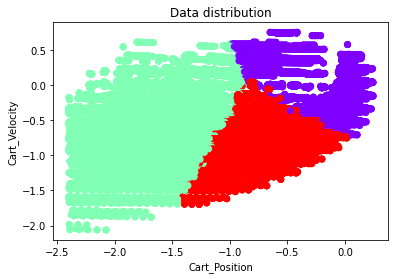

In [21]:
from matplotlib.backends.backend_pdf import PdfPages
# plotting the results:

d = {}
d['Cart_Position'] = [x[0] for x in states]
d['Cart_Velocity'] = [x[1] for x in states]
d['Pole_Angle'] = [x[2] for x in states]
d['Pole_Velocity '] = [x[3] for x in states]
d['Clusters'] = label
 
plt.figure()
plt.clf()

for i in u_labels:
    plt.scatter(d['Cart_Position'], d['Cart_Velocity'], c=d['Clusters'], cmap='rainbow',rasterized=True)
plt.title("Data distribution")
plt.xlabel("Cart_Position")
plt.ylabel("Cart_Velocity")
pp = PdfPages('a.pdf')
pp.savefig()
pp.close()
plt.show()